In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd 
import numpy as np 
import warnings
import logging
import pickle
import os

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Setting penalty='none' will ignore the C and l1_ratio parameters")
warnings.filterwarnings("ignore", category=UserWarning, message="l1_ratio must be between 0 and 1; got (l1_ratio=None)")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
logging.basicConfig(level=logging.ERROR)

np.random.seed(21)

# Data Cleaning and Preprocessing & Feature Engineering & Feature Selection


In [2]:
root_path = "\\".join(os.path.abspath(".").split('\\')[:-1])
data_path = os.path.join(root_path, "Data")
results_path = os.path.join(root_path, "Results")

In [3]:
train_data = pd.read_csv(os.path.join(data_path, "train.csv"))
test_data = pd.read_csv(os.path.join(data_path, "test.csv"))

In [4]:
train_data.shape , test_data.shape

((2000, 21), (1000, 21))

In [5]:
def save_object(obj, filename, path):
    filename = os.path.join(path, filename)
    with open(filename + ".pkl", 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
    outp.close()

def load_object(filename, path):
    filename = os.path.join(path, filename)
    with open(filename + ".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

In [6]:
'''
    Remove all rows from 'train_data' that contain any missing values.
    The 'inplace=True' parameter modifies the DataFrame in place, meaning it will directly alter 'train_data' without needing to reassign it.
'''
train_data.dropna(inplace=True)

X = train_data.drop("price_range",axis=1)
y = train_data["price_range"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [7]:
median_vector = X_train.median()
median_vector = median_vector.tolist()
# save_object(median_vector, 'median_vector', results_path)

## First Experiment:

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       113
           1       0.65      0.68      0.66       107
           2       0.56      0.67      0.61        84
           3       0.87      0.84      0.86        95

    accuracy                           0.75       399
   macro avg       0.76      0.74      0.75       399
weighted avg       0.77      0.75      0.75       399



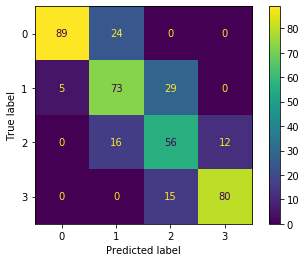

In [9]:
def classify_value(value):
    ranges = [
        (0, 1100, 0),
        (1101, 2100, 1),
        (2101, 3100, 2)
    ]
    for start, end, label in ranges:
        if start <= value <= end:
            return label
    return 3
y_preds = X_val['ram'].apply(classify_value)
print(classification_report(y_val, y_preds))
cf = confusion_matrix(y_val, y_preds)
disp = ConfusionMatrixDisplay(cf)
disp.plot()
plt.show()

## Second Experiment:

In [10]:
X_train_1 = X_train.copy()
X_val_1 = X_val.copy()
sc_1 = StandardScaler()
X_train_1 = sc_1.fit_transform(X_train_1)
X_val_1 = sc_1.transform(X_val_1)

## Third Experiment:

In [12]:
X_train_2 = X_train.copy()
X_val_2 = X_val.copy()
X_train_2['total_pxs'] = X_train_2['px_height'] * X_train_2['px_width']
X_val_2['total_pxs'] = X_val_2['px_height'] * X_val_2['px_width']
columns_to_keep = ['battery_power', 'total_pxs', 'ram']
columns_to_drop = [col for col in X_train_2.columns if col not in columns_to_keep]
X_train_2 = X_train_2.drop(columns=columns_to_drop)
sc_2 = StandardScaler()
X_val_2 = X_val_2.drop(columns=columns_to_drop)
X_train_2 = sc_2.fit_transform(X_train_2)
X_val_2 = sc_2.transform(X_val_2)

## Fourth Experiment:

In [13]:
X_train_3 = X_train.copy()
X_val_3 = X_val.copy()
columns_to_keep = ['ram']
columns_to_drop = [col for col in X_train_3.columns if col not in columns_to_keep]
X_train_3 = X_train_3.drop(columns=columns_to_drop)
X_val_3 = X_val_3.drop(columns=columns_to_drop)
sc_3 = StandardScaler()
X_train_3 = sc_3.fit_transform(X_train_3)
X_val_3 = sc_3.transform(X_val_3)

## Fifth Experiment:

In [14]:
X_train_4 = X_train.copy()
X_val_4 = X_val.copy()
X_train_4['total_pxs'] = X_train_4['px_height'] * X_train_4['px_width']
X_val_4['total_pxs'] = X_val_4['px_height'] * X_val_4['px_width']

X_train_4['sc_area'] = X_train_4['sc_h'] * X_train_4['sc_w']
X_val_4['sc_area'] = X_val_4['sc_h'] * X_val_4['sc_w']

columns_to_keep = ['battery_power', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
                   'n_cores', 'pc', 'total_pxs', 'ram', 'sc_area', 'talk_time', 'three_g']
columns_to_drop = [col for col in X_train_4.columns if col not in columns_to_keep]
X_train_4 = X_train_4.drop(columns=columns_to_drop)
X_val_4 = X_val_4.drop(columns=columns_to_drop)
sc_4 = StandardScaler()
X_train_4 = sc_4.fit_transform(X_train_4)
X_val_4 = sc_4.transform(X_val_4)

Other Experiment : PCA, Featuer selection by ML models, drift detection, 

# Modelling

In [15]:
def evaluate_model(model, x_val, y_val):
    y_preds = model.predict(x_val)
    print(classification_report(y_val,y_preds))
    cf = confusion_matrix(y_val,y_preds)
    disp = ConfusionMatrixDisplay(cf)
    disp.plot()
    plt.show()

In [16]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

In [18]:
model_params = {
    'svm': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf'],
            'C': [1, 5, 10],
            'gamma': ['scale', 'auto']
        }
    },
    'rfc': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30],
            'criterion': ['gini', 'entropy']
        }
    },
    'dtc': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'criterion': ['gini', 'entropy']
        }
    },
    'log_reg': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'saga']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 11, 19],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'gbc': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'mlp': {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive']
        }
    }
}

In [26]:
def run_grid_search(X_train, y_train):
    scores=[]
    for model_name, mp in tqdm(model_params.items()):
        try:
            clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
            clf.fit(X_train, y_train)
            scores.append({
                'model':model_name,
                'best_score':clf.best_score_,
                'best_params':clf.best_params_
            })
        except ValueError as e:
            print(f"An error occurred during grid search: {e}")
    return scores

## Second Experiment:

In [22]:
%%time
scores = run_grid_search(X_train_1, y_train)
scores

[{'model': 'svm',
  'best_score': 0.9623193549023087,
  'best_params': {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}},
 {'model': 'rfc',
  'best_score': 0.8737327734074645,
  'best_params': {'criterion': 'entropy',
   'max_depth': None,
   'n_estimators': 100}},
 {'model': 'dtc',
  'best_score': 0.8404428146132765,
  'best_params': {'criterion': 'entropy', 'max_depth': 10}},
 {'model': 'log_reg',
  'best_score': 0.9654502080006309,
  'best_params': {'C': 10, 'penalty': 'l1', 'solver': 'saga'}},
 {'model': 'knn',
  'best_score': 0.6413083338262259,
  'best_params': {'metric': 'manhattan',
   'n_neighbors': 19,
   'weights': 'distance'}},
 {'model': 'gbc',
  'best_score': 0.9026438753179157,
  'best_params': {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}},
 {'model': 'mlp',
  'best_score': 0.9579109244691548,
  'best_params': {'activation': 'tanh',
   'alpha': 0.01,
   'hidden_layer_sizes': (100,),
   'learning_rate': 'adaptive',
   'solver': 'adam'}}]

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       113
           1       0.96      0.96      0.96       107
           2       0.94      0.96      0.95        84
           3       0.98      0.99      0.98        95

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



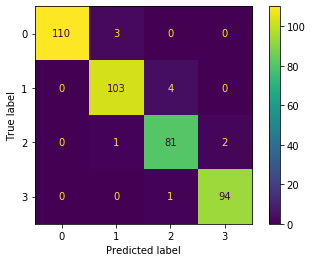

In [23]:
model=SVC(C=10,kernel ='linear')
train_model(model, X_train_1, y_train, X_val_1, y_val)
evaluate_model(model, X_val_1, y_val)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.97      0.96      0.97       107
           2       0.94      0.96      0.95        84
           3       0.98      0.99      0.98        95

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.98      0.97      0.98       399



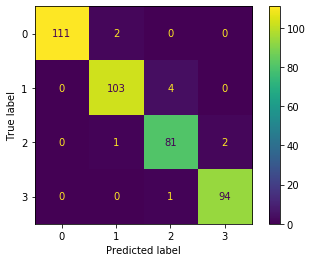

In [24]:
model=LogisticRegression(C=10, penalty='l1', solver='saga')
train_model(model, X_train_1, y_train, X_val_1, y_val)
evaluate_model(model, X_val_1, y_val)

## Third Experiment:

In [28]:
%%time
scores = run_grid_search(X_train_2, y_train)
scores

Wall time: 0 ns


[{'model': 'svm',
  'best_score': 0.9321720786262102,
  'best_params': {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}},
 {'model': 'rfc',
  'best_score': 0.9126969105498709,
  'best_params': {'criterion': 'entropy',
   'max_depth': 30,
   'n_estimators': 100}},
 {'model': 'dtc',
  'best_score': 0.8919619092683504,
  'best_params': {'criterion': 'entropy', 'max_depth': None}},
 {'model': 'log_reg',
  'best_score': 0.9296602984956921,
  'best_params': {'C': 0.1, 'penalty': 'none', 'solver': 'saga'}},
 {'model': 'knn',
  'best_score': 0.9076713787188739,
  'best_params': {'metric': 'manhattan',
   'n_neighbors': 19,
   'weights': 'distance'}},
 {'model': 'gbc',
  'best_score': 0.9070424479012636,
  'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}},
 {'model': 'mlp',
  'best_score': 0.9397093905877251,
  'best_params': {'activation': 'relu',
   'alpha': 0.01,
   'hidden_layer_sizes': (50, 50),
   'learning_rate': 'adaptive',
   'solver': 'adam'}}]

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.95      0.93      0.94       107
           2       0.86      0.89      0.88        84
           3       0.92      0.95      0.93        95

    accuracy                           0.93       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.94      0.93      0.94       399



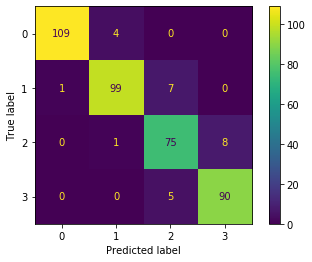

In [29]:
model=SVC(C=5, gamma='scale', kernel ='linear')
train_model(model, X_train_2, y_train, X_val_2, y_val)
evaluate_model(model, X_val_2, y_val)

## Third Experiment:

In [ ]:
%%time
scores = run_grid_search(X_train_3, y_train)
scores

## Fourth Experiment:

In [ ]:
%%time
scores = run_grid_search(X_train_4, y_train)
scores

## Infrence
Building a final model

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       113
           1       0.96      0.96      0.96       107
           2       0.94      0.96      0.95        84
           3       0.98      0.99      0.98        95

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



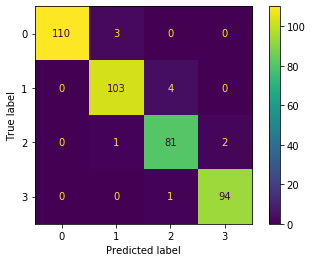

In [53]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
 ('std_scaler', StandardScaler()),
 ('Model' , SVC(C=10, kernel='linear', gamma=0.5)),
])

pipeline.fit(X_train, y_train)
evaluate_model(pipeline, X_val, y_val)

In [55]:
X_test = test_data.drop("id",axis=1)
X_test = X_test[list(X.columns)]

y_test_preds = pipeline.predict(X_test)
test_data["price_range"] = y_test_preds
test_data.sample(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
336,337,1877,1,0.5,0,4,0,10,0.9,123,...,134,610,3969,6,0,7,0,0,1,3
523,524,1970,0,2.9,0,3,1,9,0.2,163,...,110,1454,768,13,2,16,1,0,0,0
26,27,1858,0,3.0,1,0,0,17,0.6,124,...,575,1200,2427,16,11,13,1,1,0,2
118,119,1319,0,1.3,1,10,0,5,0.1,140,...,366,1821,3502,14,6,3,1,0,0,3
511,512,1391,0,1.5,1,6,1,39,0.9,88,...,491,1737,2367,18,11,12,1,1,0,2
434,435,1472,0,0.5,0,3,1,53,0.7,103,...,438,690,2001,14,0,14,1,1,1,1
875,876,1252,1,2.6,1,1,1,43,0.8,124,...,153,538,2447,18,15,11,1,0,0,1
776,777,1555,0,0.5,1,8,1,2,0.9,90,...,57,516,3596,11,6,6,1,1,1,3
466,467,1988,0,2.5,0,7,1,63,0.6,153,...,615,937,2276,13,7,11,1,0,0,2
390,391,1679,1,1.5,0,2,1,4,0.1,133,...,349,531,1557,16,15,12,1,0,1,1


In [56]:
# save_object(pipeline, 'pipeline', results_path)